### Task 1
I would like to gain insight as to what factors increase the chances of someone
purchasing a vehicle. For example I would like to be able to answer the
questions like is a twenty year old more likely to buy a car or is a fifty year
old? Or gain insight as to whether there a certain salary at which a person is
more likely to buy a car? Additionally, I would like to be able to predict the
likelihood of someone purchasing a car given some list of features. Logisitic
regression is best for this task because I am aiming to find a set of weights
which tell the probability of a binary parameter occuring, and purchasing a
vehicle is a binary decision (buy or not buy a vehicle).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("car_data.csv")
df


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


### Task 2
The dataset for this problem comes from here:
https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset.
Below, we can see that the data contains a unique user identification, gender,
age, annual salary, and whether or not the car was purchased. Columns two to
four  will be used as features, and the last column will be used as a label. We
do not use column one, the user identification, because it does not provide any
useful meaning for prediction.

To ready the data for analysis, the gender column needs to be relabelled as
numbers: a male is 0 and a female is 1. Additionally, we exclude the first
column as mentioned above. According to the data, 48.4 percent are male, which
is a fairly even split. Also, the salary and age values covers a wide range,
looking at the box plots below. In conclusion, the data being used is of good
quality, and any conclusion from the analysis is likely indicitive of the
overall population. 

Percent Male: 48.4%
Salary min, max, mean, std: 15000, 152500, 72689.0, 34471.09338271706
Age min, max, mean, std: 18, 63, 40.106, 10.701717806034694


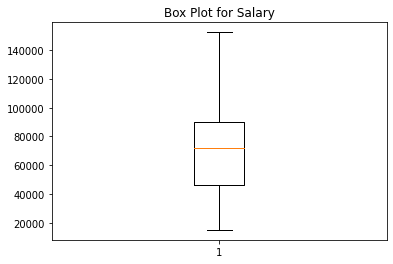

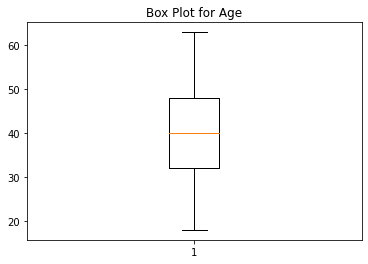

In [3]:
print("Percent Male: {}%".format(np.sum(np.asarray([df["Gender"] == "Male"]) * 1)/10))
print("Salary min, max, mean, std: {}, {}, {}, {}".format(np.min(df["AnnualSalary"]), np.max(df["AnnualSalary"]), np.mean(df["AnnualSalary"]), np.std(df["AnnualSalary"])))
print("Age min, max, mean, std: {}, {}, {}, {}".format(np.min(df["Age"]), np.max(df["Age"]), np.mean(df["Age"]), np.std(df["Age"])))

plt.figure(1)
plt.title("Box Plot for Salary")
plt.boxplot(df["AnnualSalary"])
plt.figure(2)
plt.title("Box Plot for Age")
plt.boxplot(df["Age"])
plt.show()

### Task 3
I decided to implement normal gradient descent and stochastic gradient descent.
I used the follow cost function and derivatives. For the stochastic gradient
descent, instead of summing up all elements, I simply summed one element. 

$L = -\frac{1}{n}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

$\frac{\partial L}{\partial w} = \frac{1}{n}X(A-Y)^T$

$\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^n (a^{(i)}-y^{(i)})$

In [31]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

age =norm( np.asarray(df["Age"], dtype=np.float64))
gen = norm(np.asarray([df["Gender"] == "Female"], dtype=np.float64) * 1)
salary = norm(np.asarray(df["AnnualSalary"], dtype=np.float64))
P = np.asarray(df["Purchased"], dtype=np.float64)
N = np.size(P)
P = P.reshape(1, N)
lr = .01
sdg_lr = .001

w = np.ones(shape=(3,1)) * .5
w_sgd = np.ones(shape=(3,1)) * .5

b = np.ones(shape=(1,1))
X = np.vstack((age, gen, salary))

# gradient descent
err = []
for n in range(0, N):
    A = sigmoid(np.dot(w.T,X) + b)
    dw = np.dot(X, (A-P).T)/N
    db = np.sum(A-P)/N
    w -= lr*dw
    b -= lr*db
    err.append(np.sum(np.asarray([sigmoid(np.dot(w.T,X) + b) > .5], dtype=np.float64))/N)


# stochastic gradient descent
sgd_err = []
for i in range(0, 15000):
        ind = np.random.randint(0, N)
        A = sigmoid(np.dot(w_sgd.T,X) + b)
        d_sgd = (X[:, ind] * (A[0][ind]-P[0][ind])).reshape(3, 1)
        db = A[0][ind] - P[0][ind]
        w_sgd -= sdg_lr*dw
        b -= sdg_lr*db
        sgd_err.append(np.sum(np.asarray([sigmoid(np.dot(w_sgd.T,X) + b) > .5], dtype=np.float64))/N)

gradient descent err 5.5%
sgd err 24.8%


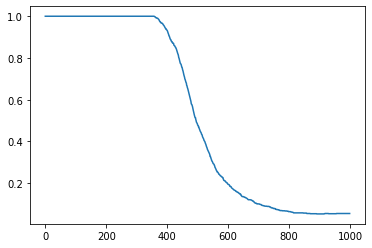

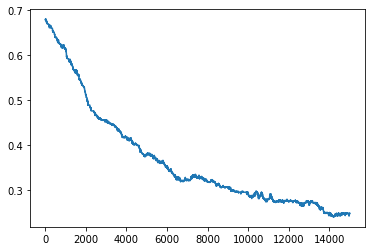

In [30]:
plt.figure(3)
plt.plot(err)
print("gradient descent err {}%".format(err[-1]*100))
plt.figure(4)
plt.plot(sgd_err)
print("sgd err {}%".format(sgd_err[-1]*100))

### Task 4